In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [4]:
DATADIR = "G:/My/data1"

CATEGORIES = ["Bacterial_spot","healthy","Early_blight","Late_blight","Septoria_leaf_spot",]


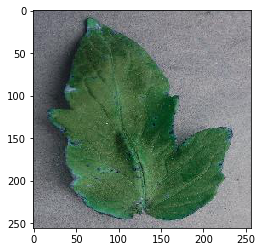

In [5]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!        
        break
    break

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (256, 256))  
                training_data.append([new_array, class_num])  
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████| 1000/1000 [00:28<00:00, 35.44it/s]


5000


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

2
3
4
0
1
2
0
2
0
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, 256, 256, 3))

X = np.array(X).reshape(-1, 256, 256, 3)

[[[[138 125 123]
   [144 131 129]
   [152 139 137]
   ...
   [175 161 155]
   [174 160 154]
   [174 160 154]]

  [[131 118 116]
   [137 124 122]
   [147 134 132]
   ...
   [175 161 155]
   [175 161 155]
   [174 160 154]]

  [[144 131 129]
   [139 126 124]
   [138 125 123]
   ...
   [178 164 158]
   [176 162 156]
   [176 162 156]]

  ...

  [[137 133 138]
   [140 136 141]
   [142 138 143]
   ...
   [167 162 161]
   [162 157 156]
   [158 153 152]]

  [[153 147 152]
   [147 141 146]
   [142 136 141]
   ...
   [165 160 159]
   [161 156 155]
   [156 151 150]]

  [[153 147 152]
   [140 134 139]
   [134 128 133]
   ...
   [163 158 157]
   [160 155 154]
   [155 150 149]]]]


In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [11]:
y[0]

2